In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import zero_one_loss

In [3]:
pip install xlrd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 984.6 kB/s eta 0:00:000:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
data = pd.read_excel('titanic.xls', 
                             usecols=['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'survived'])

In [8]:
X = data[['pclass','sex','age','sibsp','parch','fare']].copy()
#把2分变量sex变成dummy
X['sex_dummy'] = (X['sex'] == 'female').astype(int)
X = X.drop(columns=['sex'])
X.columns = ['pclass','age','siblings','parch','fare','sex']
y = data['survived']

In [9]:
X_train = X[:1100]
y_train = y[:1100]
X_test = X[1100:]
y_test = y[1100:]

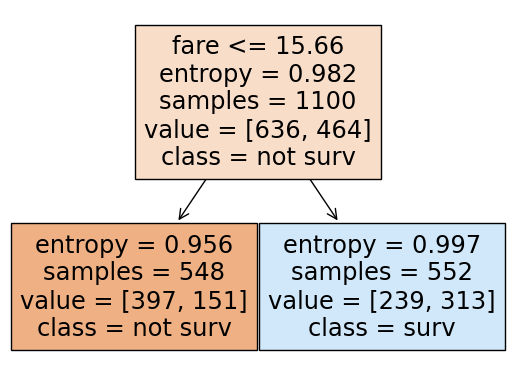

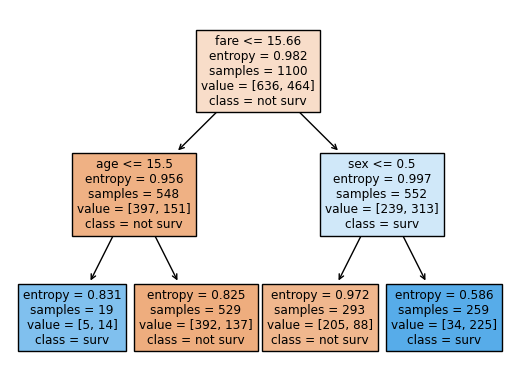

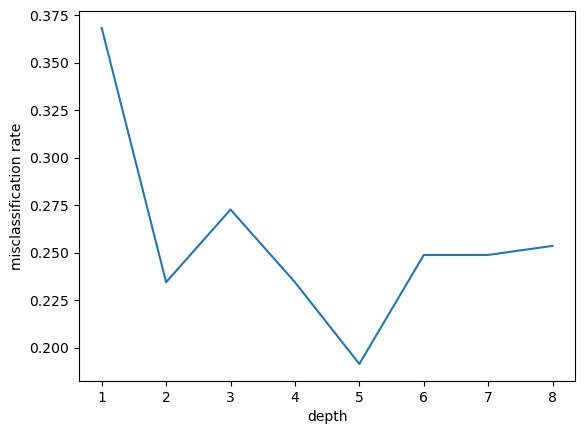

In [11]:
# 定义决策树深度范围
d_range = [1,2,3,4,5,6,7,8]

# 初始化一个空数组来存储各深度下的误分类率
misclass_rates = np.empty((len(d_range),))

for i in range(len(d_range)):
    # 根据当前深度创建并训练决策树模型
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d_range[i], random_state=0)
    clf.fit(X_train, y_train)
    
    # 当深度为1或2时，绘制并展示决策树
    if d_range[i] in [1,2]:
        plt.figure()
        #如何绘制一棵树
        #feature_names后面加list()
        plot_tree(clf, feature_names=list(X.columns), class_names=['not surv', 'surv'], filled=True)
        plt.show()
    
    # 预测测试集并计算误分类率
    y_pred = clf.predict(X_test)
    #函数返回一个浮点数，表示误分类的比例
    misclass_rates[i] = zero_one_loss(y_test, y_pred)

# 绘制不同深度下的误分类率变化图
plt.figure()
plt.plot(d_range, misclass_rates)
plt.xlabel('depth')
plt.ylabel('misclassification rate')
plt.show()

The error rate indeed reaches its lowest point at a tree depth of 6, which implies that the decision tree classifier performs best at this depth on the test data.
There is a general downward trend in error rate from a depth of 1 to 6, indicating that the model's ability to generalize is improving as it considers more features and makes more complex decisions.
After the depth of 6, the error rate increases slightly at depth 7 and then decreases at depth 8, suggesting some variability in the model's performance at these depths. This could be due to the model starting to fit the noise in the training data, which is a sign of overfitting, but it's not as clear cut since the error doesn't increase consistently.
Overall, the optimal depth for this model based on this graph seems to be 6, where the misclassification rate is at its minimum. However, to ensure that the model is not overfitting, it would be important to validate this result with additional techniques such as cross-validation.